MNIST solve by keras  
https://keras.io/examples/vision/mnist_convnet/

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
 44/422 [==>...........................] - ETA: 33s - loss: 1.9525 - accuracy: 0.3652

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


In [151]:
model.save("keras_mnist2")

INFO:tensorflow:Assets written to: keras_mnist2/assets


# Testing

In [18]:
import cv2, sys, os
import numpy as np
import matplotlib.pyplot as plt

In [139]:
model = tf.keras.models.load_model('keras_mnist')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [149]:
strokes = [2, 4, 8, 16, 32]
x_testing = []
y_testing = []
for stroke in strokes[0:3]:
    for nombre in range(10):
        for name in range(15, 22):
            if os.path.isfile(f"imageGen/28/{nombre}/{stroke}/{name}.png"):
                img = cv2.imread(f"imageGen/28/{nombre}/{stroke}/{name}.png")
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = (255-img)/255
                x_testing.append(img)
                y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                y[nombre] = 1
                y_testing.append(y)
x_testing = np.array(x_testing).reshape(len(x_testing), 28, 28, 1)
y_testing = np.array(y_testing)
x_testing.shape

(206, 28, 28, 1)

In [150]:
score = model.evaluate(x_testing, y_testing, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.31028851866722107
Test accuracy: 0.9126213788986206


In [147]:
model.fit(x_testing, y_testing, epochs=5)

Epoch 1/5
14/14 [==============================] - 0s 11ms/step - loss: 1.1421 - accuracy: 0.7085
Epoch 2/5
14/14 [==============================] - 0s 10ms/step - loss: 0.6239 - accuracy: 0.8184
Epoch 3/5
14/14 [==============================] - 0s 10ms/step - loss: 0.3621 - accuracy: 0.8991
Epoch 4/5
14/14 [==============================] - 0s 10ms/step - loss: 0.2064 - accuracy: 0.9439
Epoch 5/5
14/14 [==============================] - 0s 11ms/step - loss: 0.1688 - accuracy: 0.9529


In [11]:
type(a)

NoneType

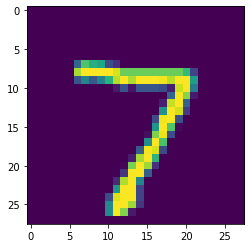

In [19]:
plt.imshow(x_test[0])

In [23]:
x_test[0].shape

(28, 28, 1)